# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


In [4]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties'],
      dtype='object')

Player's values are expressed in euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell and assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions or thousands but converting them carefully into the same scale. 

In [12]:
# Your code here:
import re

def convert_value(val):
    val = re.sub('[€KM]', '', val)
    if 'M' in val:
        val = float(val) * 1000000
    elif 'K' in val:
        val = float(val) * 1000
    else:
        val = float(val)
    return val

fifa['ValueNumeric'] = fifa['Value'].apply(convert_value)

print(fifa.head())

                Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value Preferred Foot Position  Weak Foot  ...  \
0         FC Barcelona  €110.5M           Left       RF        4.0  ...   
1             Juventus     €77M          Right       ST        4.0  ...   
2  Paris Saint-Germain  €118.5M          Right       LW        5.0  ...   
3    Manchester United     €72M          Right       GK        3.0  ...   
4      Manchester City    €102M          Right      RCM        5.0  ...   

   SprintSpeed  Stamina  Strength  LongShots  Aggression  Interceptions  \
0         86.0     72.0      59.0       94.0        48.0           22.0   
1         91.0     88.0      79.

In [17]:
fifa.columns = [col.replace(' ', '_') for col in fifa.columns]

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [24]:
# Your code here:
import statsmodels.api as sm
import pandas as pd

fifa['Value'] = fifa['ValueNumeric'].astype(float)

fifa[['Position', 'Preferred_Foot']] = fifa[['Position', 'Preferred_Foot']].fillna(value='Unknown')

pivot_table = pd.pivot_table(fifa, values='Value', index=['Position'], columns=['Preferred_Foot'], aggfunc='mean')

model = sm.formula.ols('Value ~ C(Position) + C(Preferred_Foot)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq       df         F        PR(>F)
C(Position)        9.605476e+06     27.0  4.264939  8.262084e-13
C(Preferred_Foot)  1.278456e+06      2.0  7.663258  4.712939e-04
Residual           1.516228e+09  18177.0       NaN           NaN


What is your conclusion from this ANOVA?


In [6]:
# Your conclusions here:



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [30]:
# Your code here:
from statsmodels.formula.api import ols
model = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                      sum_sq       df         F        PR(>F)
C(Nationality)  4.292914e+07    163.0  3.202987  1.976253e-38
Residual        1.483605e+09  18043.0       NaN           NaN


What is your conclusion from this ANOVA? Se puede concluir que hay una diferencia significativa por la nacionalidad

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [31]:
# Your code here:
print(fifa.isnull().sum())

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred_Foot      0
Position            0
Weak_Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64


In [32]:
fifa = fifa.dropna()

In [33]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred_Foot', 'Position', 'Weak_Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [34]:
# Your code here:
X = fifa[['Stamina', 'SprintSpeed']]
y = fifa['ValueNumeric']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Tue, 28 Mar 2023   Prob (F-statistic):             0.0116
Time:                        23:32:38   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:
# El modelo usando stamina y sprint speed no es un fit adecuado para la data


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [35]:
# Your code here:
import statsmodels.api as sm

X = sm.add_constant(fifa['Potential'])
Y = fifa['ValueNumeric']

model2 = sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          9.15e-225
Time:                        23:37:05   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
# Este modelo presenta una relaciòn positiva entre Potencial y Valor


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

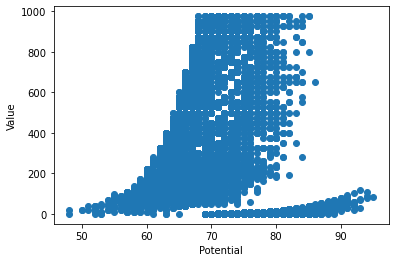

In [36]:
# Your code here:
import matplotlib.pyplot as plt

plt.scatter(fifa['Potential'], fifa['ValueNumeric'])
plt.xlabel('Potential')
plt.ylabel('Value')
plt.show()
